# Building Complex Models Using the Functional API

In [1]:
import warnings
warnings.filterwarnings(action="ignore", category=DeprecationWarning)

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np, pandas as pd
import keras
import time

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

In [3]:
housing = fetch_california_housing()
# print(housing)

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target, random_state=42)

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

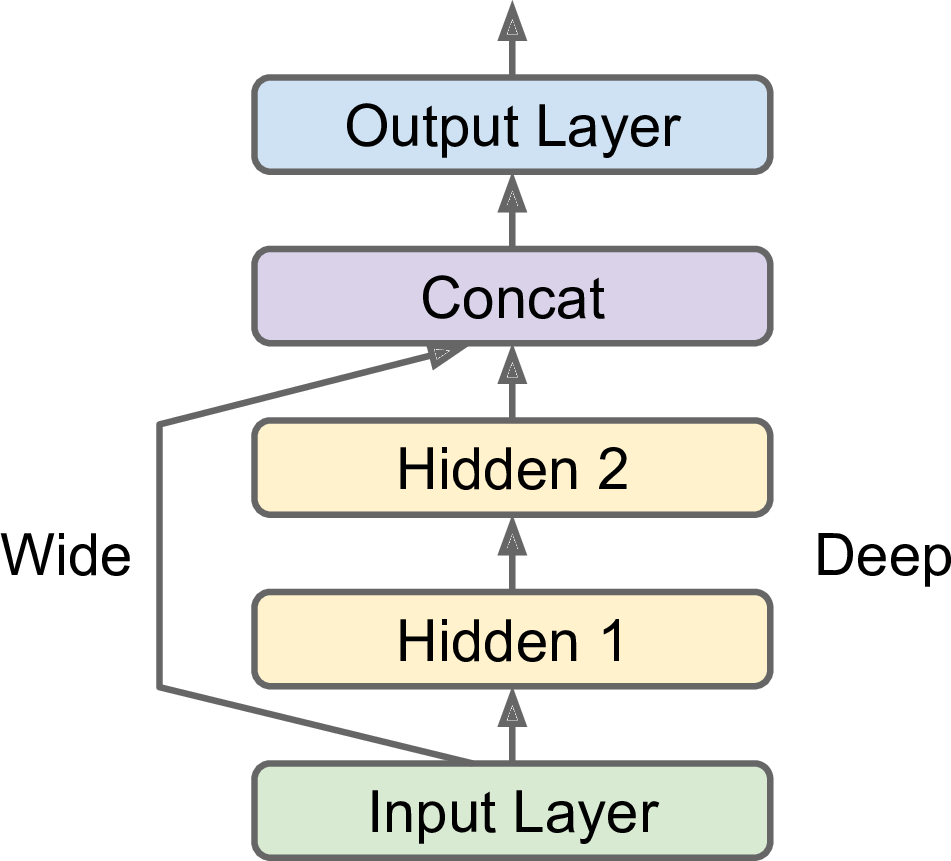

In [7]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [12]:
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2

In [10]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 2ms/step - loss: nan
nan


In [ ]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

In [ ]:
X_new

In [ ]:
model.predict(X_new)

In [ ]:
y_test[:3]

In [ ]:
y_pred

In [ ]:
mse(y_pred, y_test[:3])

In [ ]:
model.evaluate(X_test[:3], y_test[:3])

# Saving and Restoring a Model

In [ ]:
model.save("04_my_keras_model.h5")

In [ ]:
model = keras.models.load_model("04_my_keras_model.h5")

In [ ]:
from datetime import datetime
from time import strftime, localtime

In [ ]:
datetime.now().strftime('%d-%b-%Y %I:%M %p')

In [ ]:
time.time()

In [ ]:
strftime('%Y-%m-%d %H:%M:%S', localtime(time.time()))